In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df = pd.read_csv('Ertis2020.csv')

In [72]:
df

,Код поста,Дата,Значение
0,11001,2020-01-01,110.0
1,11001,2020-01-02,114.0
2,11001,2020-01-03,118.0
3,11001,2020-01-04,122.0
4,11001,2020-01-05,122.0
...,...,...,...
361,11001,2020-12-27,69.2
362,11001,2020-12-28,70.0
363,11001,2020-12-29,70.8
364,11001,2020-12-30,71.6


In [74]:
df['Дата'] = pd.to_datetime(df['Дата'])

In [75]:
# Извлекаем день, месяц и год
# Год
df['Год'] = df['Дата'].dt.year
# Месяц
df['Месяц'] = df['Дата'].dt.month
# День
df['День'] = df['Дата'].dt.day

In [77]:
df['Код поста'].unique()

array([11001], dtype=int64)

In [78]:
df[df['Значение'] == 'нб']

,Код поста,Дата,Значение,Год,Месяц,День


In [79]:
df['Значение'] = df['Значение'].replace('нб', np.nan) # Заменяем нб на nan

In [81]:
df['Значение'] = df['Значение'].fillna(0) # Заполняем nan на 0

In [82]:
df['Значение'] = df['Значение'].astype(float) # Переводим тип из object(str) в float

In [83]:
df['Значение']

0      110.0
1      114.0
2      118.0
3      122.0
4      122.0
       ...  
361     69.2
362     70.0
363     70.8
364     71.6
365     72.1
Name: Значение, Length: 366, dtype: float64

In [84]:
df['Значение'].mean() # среднее значение 

242.09726775956287

In [85]:
df['Значение'].replace(0,round(df['Значение'].mean(), ndigits=3), inplace=True) 
# заменям(заполняем) все нули на среднее значение колонки

<Axes: xlabel='Дата'>

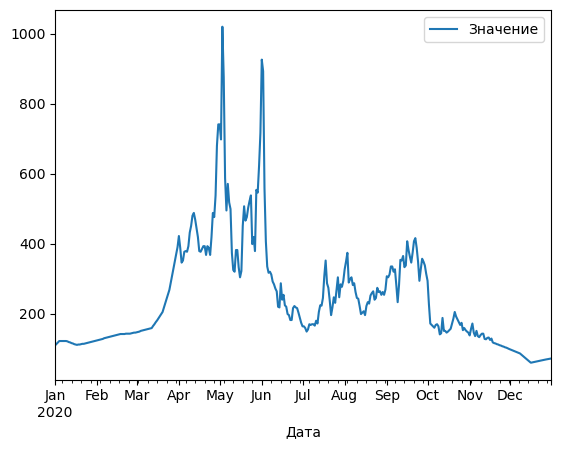

In [86]:
df.plot(kind='line', x='Дата', y='Значение')

# Обучаем модель линейной регрессии:

In [88]:
# Выделяем характеристики (год) и целевую переменную (значение) из рамки данных:
X = df['Год'].values.reshape(-1, 1)
y = df['Значение'].values

In [89]:
# Разделяем данные на обучающие и тестовые наборы, используя train_test_split из sklearn.model_selection:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [90]:
# Импортируем модель линейной регрессии из sklearn.linear_model и обучаем модель:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Make Predictions and Calculate Statistics:

In [91]:
# Делаем прогнозы на тестовом наборе, используя обученную модель:
y_pred = model.predict(X_test)

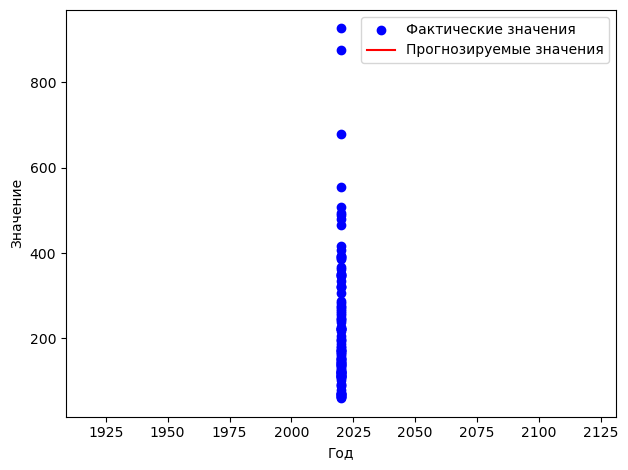

In [92]:
# Создаем точечную диаграмму фактических значений и прогнозируемых значений:
plt.scatter(X_test, y_test, color='blue', label='Фактические значения')
plt.plot(X_test, y_pred, color='red', label='Прогнозируемые значения')
plt.xlabel('Год')
plt.ylabel('Значение')
plt.legend()
plt.tight_layout()
plt.show()

Чтобы оценить точность модели линейной регрессии и сравнить фактические значения с прогнозируемыми, вы можете использовать различные регрессионные показатели. Вот пример с использованием показателей среднеквадратичной ошибки (MSE) и коэффициента детерминации (R-квадрат):

In [93]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse)

# Calculate the coefficient of determination (R-squared)
r2 = r2_score(y_test, y_pred)
print('Coefficient of Determination (R-squared):', r2)


Mean Squared Error (MSE): 24650.19388352273
Coefficient of Determination (R-squared): -0.01809158721696713


Среднеквадратичная ошибка (MSE) измеряет среднеквадратичную разницу между прогнозируемыми значениями и фактическими значениями. Более низкий MSE указывает на лучшее соответствие модели данным.

Коэффициент детерминации (R-квадрат) представляет собой долю дисперсии целевой переменной, которая может быть объяснена с помощью модели линейной регрессии. Оно колеблется от 0 до 1, где 1 означает идеальную посадку. Более высокие значения R-квадрата указывают на лучшее соответствие модели данным.

Распечатав эти показатели, вы сможете оценить точность и производительность вашей модели линейной регрессии.

In [94]:
# Рассчитаем статистические данные, такие как среднее, максимальное и минимальное значения за 1 год:
year_stats = df.groupby('Год')['Значение'].agg(['mean', 'max', 'min'])

In [95]:
year_stats

,mean,max,min
Год,,,
2020,242.097268,1020.0,60.0


In [96]:
year_stats.describe()

,mean,max,min
count,1.000000,1.0,1.0
mean,242.097268,1020.0,60.0
std,NaN,NaN,NaN
min,242.097268,1020.0,60.0
25%,242.097268,1020.0,60.0
50%,242.097268,1020.0,60.0
75%,242.097268,1020.0,60.0
max,242.097268,1020.0,60.0
